# LASERBEANS
Tools for quick data exploration and presentation
***

In [1]:
import pandas as pd
import laserbeans.dates_n_periods as dnp
import laserbeans.selectors as sel
import laserbeans.resamplers as smp
import laserbeans.tables as tbl
import laserbeans.charts as chrt

df = pd.read_pickle('test_data/enrollment_data.pkl')

### Plotting the number of enrollment request per week for the 2018 academic year
In the example below we plot the number of enrolments per week.
To do so, we first select only the records for the 2018 academic year with the **pandas** `query` method.
Then we use the **laserbeans** `aggregate_time` function from the **tables** module to count the records per week.

- The `grouper_cols` is set to *ENROLLMENT_TYPE* as our category.
- The (time) `unit` is set to 'W' for weeks.
- Finally, setting `use_dt` to `True` returns the weeks as dates instead of week numbers.

Because we want to show the enrollment types in a defined order, we create a list from the categories from the field `ENROLLMENT_TYPE`.
Finally we use the **laserbeans** `generate_chart` function form the **charts** module to create a **vega** stacked bar chart using **altair**.

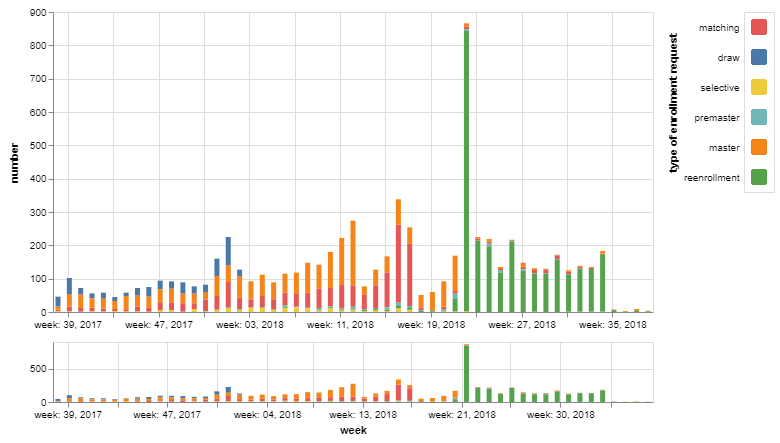

In [2]:
qry = """ACADEMIC_YEAR == 2018"""
df_rpw = tbl.aggregate_time(df.query(qry), 'REQUEST_DATE', grouper_cols='ENROLLMENT_TYPE', 
                            start=(2017, 10, 1), end=(2018, 10, 1), unit='W', use_dt=True)
df_rpw.index.name = 'week'

enrollment_types = df.ENROLLMENT_TYPE.cat.categories.tolist()
chrt.generate_chart(df_rpw, 'number', 'type of enrollment request', 
                    var_order=enrollment_types, mark='bar', zoom=True, stack='zero', unit='W')